#Course_03

Natural Language Processing in Tensorflow

##Week 02

### First NLP Deep learning Model :

In [0]:
import tensorflow as tf
print(tf.__version__)

2.2.0-rc2


In [0]:
!pip install -q tensorflow-datasets

In [0]:
#Now lets import the datasets: 
import tensorflow_datasets as tfds
imdb,info = tfds.load('imdb_reviews',with_info = True,as_supervised = True)

import numpy as np 

train_data , test_data = imdb['train'], imdb['test']
#print(train_data.shape)


training_sentences = []
training_labels = []

testing_sentences = []
testing_labels = []

for s,l in train_data:
  training_sentences.append(str(s.numpy()))
  training_labels.append(l.numpy())

for s,l in test_data:
  testing_sentences.append(str(s.numpy()))
  testing_labels.append(l.numpy())


print(len(training_labels))

train_labels_final = np.array(training_labels)
test_labels_final = np.array(testing_labels)
print(train_labels_final.shape)

25000
(25000,)


In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer

my_num_words = 10000
my_maxlen = 120
embedding_dim = 16


myTokenizer = Tokenizer(num_words = my_num_words,
                        lower = True,
                        filters = "!@#$%^&*()_+-=[]{};':<>?,./",
                        char_level = False,
                        oov_token = '<OOV>',
                        split = ' ',
                        )

myTokenizer.fit_on_texts(training_sentences)

word_indexes = myTokenizer.word_index
#print(word_indexes)

train_sequences = myTokenizer.texts_to_sequences(training_sentences)
#print(train_sequences)

test_sequences = myTokenizer.texts_to_sequences(testing_sentences)
#print(test_sequences)

from tensorflow.keras.preprocessing.sequence import pad_sequences

train_padded = pad_sequences(train_sequences,maxlen = my_maxlen , padding = 'post',truncating = 'post')
test_padded = pad_sequences(test_sequences,maxlen = my_maxlen , padding = 'post',truncating = 'post')

**embedding dimension** :  It is the number of Dimensions for the vector representing the word encoding.

In [0]:
# Now lets define the neural network :

embedding_dim = 16 

model = tf.keras.Sequential([
                             
        tf.keras.layers.Embedding( input_dim = my_num_words,output_dim = embedding_dim, input_length = my_maxlen,),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(units = 6 , activation = 'relu'),
        tf.keras.layers.Dense(units = 1,activation = 'sigmoid')
])

model.summary()

# inpalce of Flatten() we can use GlobalAveragePooling1D()

model_1 = tf.keras.Sequential([
                             
        tf.keras.layers.Embedding( input_dim = my_num_words,output_dim = embedding_dim, input_length = my_maxlen,),
        tf.keras.layers.GlobalAveragePooling1D(),
        tf.keras.layers.Dense(units = 6 , activation = 'relu'),
        tf.keras.layers.Dense(units = 1,activation = 'sigmoid')
])

model_1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 120, 16)           160000    
_________________________________________________________________
flatten_2 (Flatten)          (None, 1920)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 6)                 11526     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 7         
Total params: 171,533
Trainable params: 171,533
Non-trainable params: 0
_________________________________________________________________
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 120, 16)           160000    
__________________________

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),metrics = ['accuracy'])

model_1.compile(loss = 'binary_crossentropy', optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),metrics = ['accuracy'])

In [0]:
model.fit(train_padded,
          train_labels_final,
          epochs = 25,
          validation_data = (test_padded,test_labels_final) )

Epoch 1/5
782/782 [==============================] - 3s 4ms/step - loss: 0.5360 - accuracy: 0.7173 - val_loss: 0.3878 - val_accuracy: 0.8239
Epoch 2/5
782/782 [==============================] - 3s 4ms/step - loss: 0.3064 - accuracy: 0.8722 - val_loss: 0.3918 - val_accuracy: 0.8250
Epoch 3/5
782/782 [==============================] - 3s 4ms/step - loss: 0.2265 - accuracy: 0.9092 - val_loss: 0.4147 - val_accuracy: 0.8236
Epoch 4/5
782/782 [==============================] - 3s 4ms/step - loss: 0.1497 - accuracy: 0.9479 - val_loss: 0.4580 - val_accuracy: 0.8166
Epoch 5/5
782/782 [==============================] - 3s 4ms/step - loss: 0.0818 - accuracy: 0.9756 - val_loss: 0.5524 - val_accuracy: 0.8006


In [0]:
model_1.fit(train_padded,
          train_labels_final,
          epochs = 2,
          validation_data = (test_padded,test_labels_final) )

Epoch 1/2
782/782 [==============================] - 3s 4ms/step - loss: 0.6221 - accuracy: 0.7212 - val_loss: 0.5138 - val_accuracy: 0.7861
Epoch 2/2
782/782 [==============================] - 3s 4ms/step - loss: 0.4139 - accuracy: 0.8272 - val_loss: 0.3939 - val_accuracy: 0.8251


In [0]:
e  = model.layers[0]    #layer 0 is the embedding layer
weights = e.get_weights()[0]
print(weights.shape)

(10000, 16)


Now lets try to display the embedding that is the vectorial representation of the words in the higher dimention using tensorflow.embedding plots website 

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_indexes.items()])

def decode_review(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])

print(decode_review(train_padded[3]))
print(training_sentences[3])

b this is the kind of film for a snowy sunday afternoon when the rest of the world can go ahead with its own business as you <OOV> into a big arm chair and <OOV> for a couple of hours wonderful performances from cher and nicolas cage as always gently row the plot along there are no <OOV> to cross no dangerous waters just a warm and witty <OOV> through new york life at its best a family film in every sense and one that deserves the praise it received ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ? ?
b'This is the kind of film for a snowy Sunday afternoon when the rest of the world can go ahead with its own business as you descend into a big arm-chair and mellow for a couple of hours. Wonderful performances from Cher and Nicolas Cage (as always) gently row the plot along. There are no rapids to cross, no dangerous waters, just a warm and witty paddle through New York life at its best. A family film in every sense and one that deserves the praise it received.'


In [0]:
# import io

# out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
# out_m = io.open('meta.tsv', 'w', encoding='utf-8')

# for word_num in range(1, my_num_words):
#   word = reverse_word_index[word_num]
#   embeddings = weights[word_num]
#   out_m.write(word + "\n")
#   out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")

# out_v.close()
# out_m.close()

In [0]:
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download('vecs.tsv')
#   files.download('meta.tsv')

In [0]:
sentence = "I really think this is amazing. honest."
sequence = myTokenizer.texts_to_sequences(sentence)
print(sequence)

[[11], [], [1502], [949], [4], [1791], [1791], [4981], [], [22], [2052], [11], [2399], [2333], [], [22], [2052], [11], [14], [], [11], [14], [], [4], [146], [4], [4664], [11], [2399], [1352], [], [], [2052], [1047], [2399], [949], [14], [22], []]


### 2nd NLP deep Learning Model : Sarcasm Dataset 

In [0]:
import tensorflow as tf 

#---------------------------------download the dataset-----------------------------------
!wget --no-check-certificate \
      "https://storage.googleapis.com/laurencemoroney-blog.appspot.com/sarcasm.json" \
         --output-document=sarcasm.json

#-----------------------create data for model from download---------------------------
import json
file_path = '/content/sarcasm.json'

with open(file_path,'r') as f:
  datastore=json.load(f)

sentences = []
labels = []
urls = []

for item in datastore:
  sentences.append(item['headline'])
  labels.append(item['is_sarcastic'])
  urls.append(item['article_link'])

#-----------------------------------Create the training and testing set -----------------------

training_size = 20000


training_sentences = sentences[0:training_size]
training_labels = labels[0:training_size]
training_labels = np.array(training_labels)

testing_sentences = sentences[training_size:]
testing_labels = labels[training_size:]
testing_labels = np.array(testing_labels)

#----------------------------------------Fix the hyperparameters---------------------------------

vocab_size = 10000
embedding_dim = 16
max_length = 32
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'


#------------------------- Building the Tokenizer ---------------------------------------

from tensorflow.keras.preprocessing.text import Tokenizer

myTokenizer = Tokenizer(num_words = vocab_size,
                        filters = "!@#$%^&*()_+-=[]][:;?.,<>/",
                        split = ' ',
                        lower = True,
                        char_level = False,
                        oov_token = oov_tok)

myTokenizer.fit_on_texts(training_sentences)

word_index = myTokenizer.word_index


# --------------------------------- create the sequences ------------------------------------

from tensorflow.keras.preprocessing.sequences import pad_sequences


train_sequences = myTokenizer.texts_to_sequences(training_sentences)
train_padded = pad_sequences(
                             train_sequences,
                             maxlen = max_length,
                             truncating = trunc_type,
                             padding = padding_type,
                            )


test_sequences = myTokenizer.texts_to_sequences(testing_sentences)
test_padded = pad_sequences(
                       test_sequences,
                       maxlen = max_length,
                       truncating = trunc_type,
                       padding = padding_type,
                       )

#---------------------------- Build the Model ------------------------------------------------------

model = tf.keras.models.Sequential([
            tf.keras.layers.Embedding(input_dim = vocab_size, output_dim = embedding_dim ,input_length = max_length),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(units = 6, activation = 'relu'),
            tf.keras.layers.Dense(units = 1 , activation = "sigmoid")
])

#----------------------- Compile the Model---------------------------------------------------

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

# -------------------- Train the Model------------------------------------------------------

history = model.fit(
                       train_padded,
                       training_labels,
                       epochs = 20,
                       validation_data = (test_padded,testing_labels))



In [0]:
import matplotlib.pyplot as plt

train_acc = history.history['accuracy']
train_loss = history.history['loss']

test_acc = history.history['val_accuracy']
test_loss = history.history['val_loss']

no_of_epochs = range(len(train_acc))

plt.plot(no_of_epochs,train_acc,'r')
plt.plot(no_of_epochs,test_acc,'b')
plt.title('Training Vs Testing Accuracy')

plt.figure()

plt.plot(no_of_epochs,train_loss,'r')
plt.plot(no_of_epochs,test_loss,'b')
plt.title('Training Vs Testing Loss')
plt.show()

###3rd NLP deep Learning Model : IMDB Subwords :

In [0]:
# # Incase you do not have the updated tensorflow version 2.0.0 alpha0 run either of the below commands:
# # For colab it is not required :

# !pip install tensorflow==2.0.0-alpha0
#!pip install tensorflow --upgrade --force-reinstall

!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1

ERROR! Session/line number was not unique in database. History logging moved to new session 62
     |████████████████████████████████| 87.9MB 53kB/s 
     |████████████████████████████████| 3.1MB 35.3MB/s 
     |████████████████████████████████| 501kB 47.7MB/s 
  Found existing installation: tensorflow 2.1.0
    Uninstalling tensorflow-2.1.0:
      Successfully uninstalled tensorflow-2.1.0


     |████████████████████████████████| 3.0MB 2.7MB/s 
  Found existing installation: tensorflow-datasets 2.1.0
    Uninstalling tensorflow-datasets-2.1.0:
      Successfully uninstalled tensorflow-datasets-2.1.0


In [0]:
import tensorflow as tf
print(tf.__version__)

2.0.0-beta0


In [0]:
# if you do not have the datasets install then run the code below 
# For colabs not required :

#!pip install -q tensorflow-datasets

import tensorflow_datasets as tfds
imdb,info = tfds.load('imdb_reviews/subwords8k', with_info = True , as_supervised = True)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/0.1.0. Subsequent calls will reuse this data.


In [0]:
train_data , test_data = imdb['train'],imdb['test']

In [0]:
#lets use the tokenizer of the tfds:

tokenizer = info.features['text'].encoder
print(tokenizer.subwords)

['the_', ', ', '. ', 'a_', 'and_', 'of_', 'to_', 's_', 'is_', 'br', 'in_', 'I_', 'that_', 'this_', 'it_', ' /><', ' />', 'was_', 'The_', 'as_', 't_', 'with_', 'for_', '.<', 'on_', 'but_', 'movie_', ' (', 'are_', 'his_', 'have_', 'film_', 'not_', 'ing_', 'be_', 'ed_', 'you_', ' "', 'it', 'd_', 'an_', 'he_', 'by_', 'at_', 'one_', 'who_', 'y_', 'from_', 'e_', 'or_', 'all_', 'like_', 'they_', '" ', 'so_', 'just_', 'has_', ') ', 'her_', 'about_', 'out_', 'This_', 'some_', 'ly_', 'movie', 'film', 'very_', 'more_', 'It_', 'would_', 'what_', 'when_', 'which_', 'good_', 'if_', 'up_', 'only_', 'even_', 'their_', 'had_', 'really_', 'my_', 'can_', 'no_', 'were_', 'see_', 'she_', '? ', 'than_', '! ', 'there_', 'get_', 'been_', 'into_', ' - ', 'will_', 'much_', 'story_', 'because_', 'ing', 'time_', 'n_', 'we_', 'ed', 'me_', ': ', 'most_', 'other_', 'don', 'do_', 'm_', 'es_', 'how_', 'also_', 'make_', 'its_', 'could_', 'first_', 'any_', "' ", 'people_', 'great_', 've_', 'ly', 'er_', 'made_', 'r_', 'B

AS YOU CAN SEE WE HAVE KEPT THE PUNTUATIONS ASWELL !!!!

In [0]:
# lets check this encoder / tokenizer :

sample_string = 'Tensorflow, from basics to Mastery!'

tokenized_string = tokenizer.encode(sample_string)
print('tokenized string is : {}'.format(tokenized_string))

original_string = tokenizer.decode(tokenized_string)
print('The original String is : {}'.format(original_string))

tokenized string is : [6307, 2327, 2934, 2, 48, 4249, 4429, 7, 5057, 8050, 7962]
The original String is : Tensorflow, from basics to Mastery!


In [0]:
for ts in tokenized_string:
  print('{} ----> {}'.format(ts,tokenizer.decode([ts])))

6307 ----> Ten
2327 ----> sor
2934 ----> flow
2 ----> , 
48 ----> from 
4249 ----> basi
4429 ----> cs 
7 ----> to 
5057 ----> Master
8050 ----> y
7962 ----> !


In [0]:
embedding_dim = 64

model = tf.keras.models.Sequential([
                                    tf.keras.layers.Embedding(tokenizer.vocab_size,embedding_dim),
                                    tf.keras.layers.GlobalAveragePooling1D(),
                                    tf.keras.layers.Dense(units = 6,activation = 'relu'),
                                    tf.keras.layers.Dense(units = 1 , activation = 'sigmoid')
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
global_average_pooling1d (Gl (None, 64)                0         
_________________________________________________________________
dense (Dense)                (None, 6)                 390       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 7         
Total params: 524,237
Trainable params: 524,237
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 1 

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.001),loss = 'binary_crossentropy',metrics = ['accuracy'])

# if x is a dataset, generaator , keras.utils.sequence then y need not be mentioned as y will be calculated from x only
# here x is a dataset .

history = model.fit(train_data,epochs = num_epochs,validation_data = test_data)


'''
The code seems to have an issue with RC0. It throws ValueError: logits and labels must have the same shape ((None, 1) vs ()) .
The current official version of the notebook uses beta0 and that works.

Run the below code and restart the runtime and execute from begining 

!pip install tensorflow==2.0.0-beta0
!pip install tensorflow-datasets==1.3.1


'''

25000/25000 [==============================] - 458s 18ms/step - loss: 0.6857 - accuracy: 0.5392 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


'\nThe code seems to have an issue with RC0. It throws ValueError: logits and labels must have the same shape ((None, 1) vs ()) .\nThe current official version of the notebook uses beta0 and that works.\n\n!pip install tensorflow==2.0.0-beta0\n!pip install tensorflow-datasets==1.3.1\n\n\n'

In [0]:
# !pip install tensorflow==2.0.0-beta0
# !pip install tensorflow-datasets==1.3.1

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, tokenizer.vocab_size):
  word = tokenizer.decode([word_num])
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()


try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')

###Exercise 2- BBC news archive

This week you will build on last week’s exercise where you tokenized words from the BBC news reports dataset. This dataset contains articles that are classified into a number of different categories. See if you can design a neural network that can be trained on this dataset to accurately determine what words determine what category. Create the vecs.tsv and meta.tsv files and load them into the embedding projector.

In [0]:
import csv
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

!wget --no-check-certificate \
    https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv \
    -O /tmp/bbc-text.csv

--2020-04-06 18:57:48--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/bbc-text.csv
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 2607:f8b0:400c:c13::80
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5057493 (4.8M) [application/octet-stream]
Saving to: ‘/tmp/bbc-text.csv’

/tmp/bbc-text.csv   100%[===================>]   4.82M  --.-KB/s    in 0.07s   

2020-04-06 18:57:49 (72.2 MB/s) - ‘/tmp/bbc-text.csv’ saved [5057493/5057493]



In [0]:
# Fix the hyperparameters value s:
vocab_size = 1000
embedding_dim = 16
max_length = 120
trunc_type='post'
padding_type='post'
oov_tok = "<OOV>"
training_portion = .8

In [0]:
sentences = []
labels = []

In [0]:
stopwords = [ "a", "about", "above", "after", "again", "against", "all", "am", "an", "and", "any", "are", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but", "by", "could", "did", "do", "does", "doing", "down", "during", "each", "few", "for", "from", "further", "had", "has", "have", "having", "he", "he'd", "he'll", "he's", "her", "here", "here's", "hers", "herself", "him", "himself", "his", "how", "how's", "i", "i'd", "i'll", "i'm", "i've", "if", "in", "into", "is", "it", "it's", "its", "itself", "let's", "me", "more", "most", "my", "myself", "nor", "of", "on", "once", "only", "or", "other", "ought", "our", "ours", "ourselves", "out", "over", "own", "same", "she", "she'd", "she'll", "she's", "should", "so", "some", "such", "than", "that", "that's", "the", "their", "theirs", "them", "themselves", "then", "there", "there's", "these", "they", "they'd", "they'll", "they're", "they've", "this", "those", "through", "to", "too", "under", "until", "up", "very", "was", "we", "we'd", "we'll", "we're", "we've", "were", "what", "what's", "when", "when's", "where", "where's", "which", "while", "who", "who's", "whom", "why", "why's", "with", "would", "you", "you'd", "you'll", "you're", "you've", "your", "yours", "yourself", "yourselves" ]
print(len(stopwords))
# Expected Output
# 153

153


In [0]:
# Now lets read the csv file to create our train and tets set :


with open("/tmp/bbc-text.csv", 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    next(reader)
    for row in reader:
        labels.append(row[0])
        sentence = row[1]
        for word in stopwords:
            token = " " + word + " "
            sentence = sentence.replace(token, " ")
        sentences.append(sentence)

print(len(labels))
print(len(sentences))
print(sentences[0])
# Expected Output
# 2225
# 2225
# tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertainment. us networks cable satellite companies worried means terms advertising revenues well  brand identity  viewer loyalty channels. although us leads technology moment  also concern raised europe  particularly growing uptake services like sky+.  happens today  will see nine months years  time uk   adam hume  bbc broadcast s futurologist told bbc news website. likes bbc  no issues lost advertising revenue yet. pressing issue moment commercial uk broadcasters  brand loyalty important everyone.  will talking content brands rather network brands   said tim hanlon  brand communications firm starcom mediavest.  reality broadband connections  anybody can producer content.  added:  challenge now hard promote programme much choice.   means  said stacey jolna  senior vice president tv guide tv group  way people find content want watch simplified tv viewers. means networks  us terms  channels take leaf google s book search engine future  instead scheduler help people find want watch. kind channel model might work younger ipod generation used taking control gadgets play them. might not suit everyone  panel recognised. older generations comfortable familiar schedules channel brands know getting. perhaps not want much choice put hands  mr hanlon suggested.  end  kids just diapers pushing buttons already - everything possible available   said mr hanlon.  ultimately  consumer will tell market want.   50 000 new gadgets technologies showcased ces  many enhancing tv-watching experience. high-definition tv sets everywhere many new models lcd (liquid crystal display) tvs launched dvr capability built  instead external boxes. one example launched show humax s 26-inch lcd tv 80-hour tivo dvr dvd recorder. one us s biggest satellite tv companies  directtv  even launched branded dvr show 100-hours recording capability  instant replay  search function. set can pause rewind tv 90 hours. microsoft chief bill gates announced pre-show keynote speech partnership tivo  called tivotogo  means people can play recorded programmes windows pcs mobile devices. reflect increasing trend freeing multimedia people can watch want  want.

2225
2225
tv future hands viewers home theatre systems  plasma high-definition tvs  digital video recorders moving living room  way people watch tv will radically different five years  time.  according expert panel gathered annual consumer electronics show las vegas discuss new technologies will impact one favourite pastimes. us leading trend  programmes content will delivered viewers via home networks  cable  satellite  telecoms companies  broadband service providers front rooms portable devices.  one talked-about technologies ces digital personal video recorders (dvr pvr). set-top boxes  like us s tivo uk s sky+ system  allow people record  store  play  pause forward wind tv programmes want.  essentially  technology allows much personalised tv. also built-in high-definition tv sets  big business japan us  slower take off europe lack high-definition programming. not can people forward wind adverts  can also forget abiding network channel schedules  putting together a-la-carte entertai

In [0]:
train_size = int(len(sentences) * training_portion)

train_sentences = sentences[:train_size]
train_labels = labels[:train_size]

validation_sentences = sentences[train_size:]
validation_labels = labels[train_size:]

print(train_size)
print(len(train_sentences))
print(len(train_labels))
print(len(validation_sentences))
print(len(validation_labels))

# Expected output (if training_portion=.8)
# 1780
# 1780
# 1780
# 445
# 445

1780
1780
1780
445
445


In [0]:
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_sentences)
word_index = tokenizer.word_index

train_sequences = tokenizer.texts_to_sequences(train_sentences)
train_padded = pad_sequences(train_sequences, padding=padding_type, maxlen=max_length)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

# Expected Ouput
# 449
# 120
# 200
# 120
# 192
# 120

449
120
200
120
192
120


In [0]:
validation_sequences = tokenizer.texts_to_sequences(validation_sentences)
validation_padded = pad_sequences(validation_sequences, padding=padding_type, maxlen=max_length)

print(len(validation_sequences))
print(validation_padded.shape)

# Expected output
# 445
# (445, 120)

445
(445, 120)


In [0]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels)

training_label_seq = np.array(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.array(label_tokenizer.texts_to_sequences(validation_labels))

print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

# Expected output
# [4]
# [2]
# [1]
# (1780, 1)
# [5]
# [4]
# [3]
# (445, 1)

[4]
[2]
[1]
(1780, 1)
[5]
[4]
[3]
(445, 1)


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_size, embedding_dim, input_length=max_length),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(6, activation='softmax')
])
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

# Expected Output
# Layer (type)                 Output Shape              Param #   
# =================================================================
# embedding (Embedding)        (None, 120, 16)           16000     
# _________________________________________________________________
# global_average_pooling1d (Gl (None, 16)                0         
# _________________________________________________________________
# dense (Dense)                (None, 24)                408       
# _________________________________________________________________
# dense_1 (Dense)              (None, 6)                 150       
# =================================================================
# Total params: 16,558
# Trainable params: 16,558
# Non-trainable params: 0

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 120, 16)           16000     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 24)                408       
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 150       
Total params: 16,558
Trainable params: 16,558
Non-trainable params: 0
_________________________________________________________________


In [0]:
num_epochs = 30
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Train on 1780 samples, validate on 445 samples
Epoch 1/30
1780/1780 - 0s - loss: 1.7730 - accuracy: 0.3635 - val_loss: 1.7457 - val_accuracy: 0.4427
Epoch 2/30
1780/1780 - 0s - loss: 1.7098 - accuracy: 0.4629 - val_loss: 1.6615 - val_accuracy: 0.4472
Epoch 3/30
1780/1780 - 0s - loss: 1.6044 - accuracy: 0.4697 - val_loss: 1.5414 - val_accuracy: 0.4831
Epoch 4/30
1780/1780 - 0s - loss: 1.4576 - accuracy: 0.4893 - val_loss: 1.3816 - val_accuracy: 0.5191
Epoch 5/30
1780/1780 - 0s - loss: 1.2711 - accuracy: 0.5809 - val_loss: 1.2008 - val_accuracy: 0.6135
Epoch 6/30
1780/1780 - 0s - loss: 1.0723 - accuracy: 0.7264 - val_loss: 1.0204 - val_accuracy: 0.7618
Epoch 7/30
1780/1780 - 0s - loss: 0.8808 - accuracy: 0.8371 - val_loss: 0.8626 - val_accuracy: 0.8337
Epoch 8/30
1780/1780 - 0s - loss: 0.7201 - accuracy: 0.8910 - val_loss: 0.7335 - val_accuracy: 0.8764
Epoch 9/30
1780/1780 - 0s - loss: 0.5892 - accuracy: 0.9096 - val_loss: 0.6329 - val_accuracy: 0.8652
Epoch 10/30
1780/1780 - 0s - loss: 

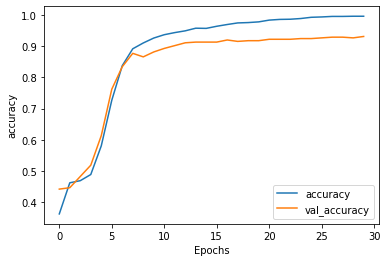

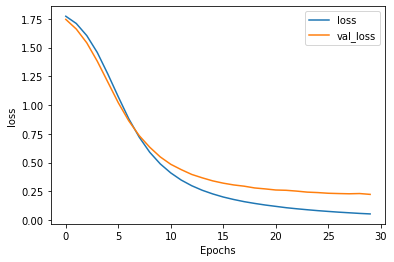

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [0]:
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

def decode_sentence(text):
    return ' '.join([reverse_word_index.get(i, '?') for i in text])


In [0]:
e = model.layers[0]
weights = e.get_weights()[0]
print(weights.shape) # shape: (vocab_size, embedding_dim)

# Expected output
# (1000, 16)

(1000, 16)


In [0]:
import io

out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()

In [0]:
try:
  from google.colab import files
except ImportError:
  pass
else:
  files.download('vecs.tsv')
  files.download('meta.tsv')